In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from app import ExponentialMixtureModel

In [2]:
# Helper functions
def Z(lambdas: np.ndarray | list, true_weights: np.ndarray, size: int = 100, random_state: int = 42):
    '''
    Computa una mixtura de funciones exponenciales con dos componentes.

    Args:
    - lambdas: np.ndarray, tasas de las distribuciones exponenciales.
    - true_weights: np.ndarray, pesos de las distribuciones exponenciales.
    - size: int, tamaño de la muestra.
    - random_state: int, semilla aleatoria.
    '''
    if isinstance(lambdas, list):
        lambdas = np.array(lambdas)
    elif isinstance(lambdas, np.ndarray):
        pass
    else:
        raise ValueError('Incorrect input value. lambdas should be a Numpy ndarray or list.')

    # Seed
    np.random.seed(random_state)

    # Genera distribuciones exponenciales
    X1 = np.random.exponential(scale=lambdas[0], size=size)
    X2 = np.random.exponential(scale=lambdas[1], size=size)

    # Genera la variable latente Z
    X = np.zeros(shape=100)
    target = np.zeros(shape=100)
    for i in np.arange(len(X1)):
        z = np.random.choice([0, 1], p=true_weights)
        if z == 0:
            X[i] = X1[i]
            target[i] = 0
        else:
            X[i] = X2[i]
            target[i] = 1
    
    return X, target

def sample(lambdas: tuple, size: int = 100, random_state: int = 42):
    '''
    Computa una mixtura de funciones exponenciales con dos componentes.

    Args:
    - lambdas: tuple, tasas de las distribuciones exponenciales.
    - size: int, tamaño de la muestra.
    - random_state: int, semilla aleatoria.
    '''

    # Seed
    np.random.seed(random_state)

    # Genera distribuciones exponenciales
    X1 = np.random.exponential(scale=lambdas[0], size=size)
    X2 = np.random.exponential(scale=lambdas[1], size=size)

    # Genera la variable X y target
    X = np.concatenate([X1, X2])
    target = np.concatenate([np.zeros(shape=size), np.ones(shape=size)])
    
    return X, target

## Primer muestra

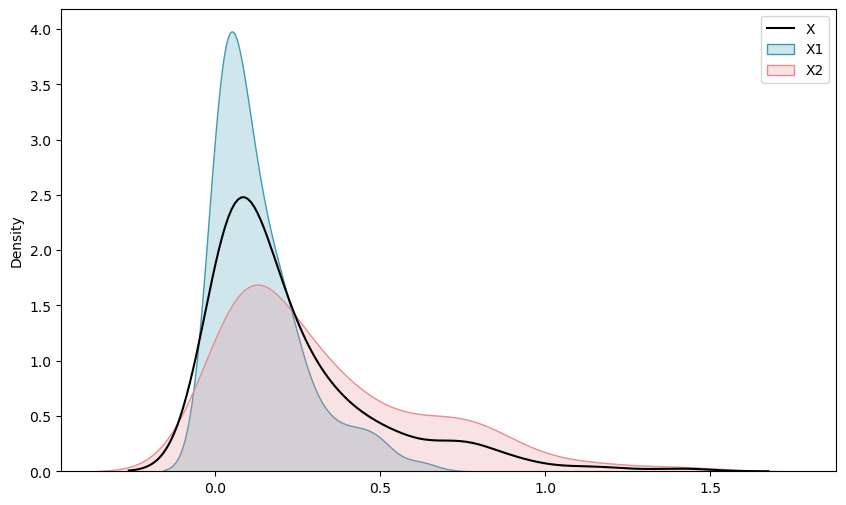

In [3]:
# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/7, size=100)
X2 = np.random.exponential(scale=1/3, size=100)

# Genera la mixtura
X = np.concatenate([X1, X2])
target = np.concatenate([np.zeros(100), np.ones(100)])

# Visualización de los datos
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X')
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1')
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2')
ax.legend()

In [4]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 59.50%
Accuracy GMM: 65.50%


## Segunda muestra

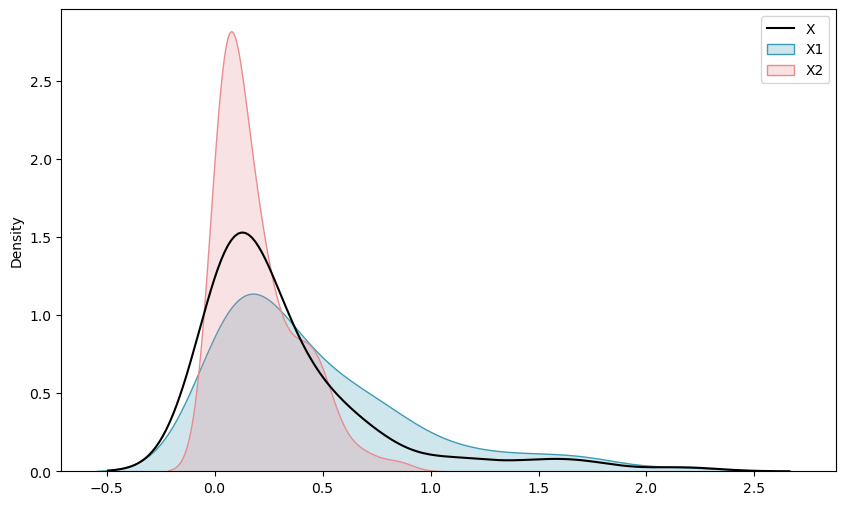

In [5]:
# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/2, size=100)
X2 = np.random.exponential(scale=1/5, size=100)

# Genera la mixtura
X, target = Z(lambdas=[1/2, 1/5], true_weights=[0.5, 0.5], size=100, random_state=42)

# Visualización de los datos
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X')
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1')
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2')
ax.legend()

In [6]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 31.00%
Accuracy GMM: 32.00%


## Tercera muestra

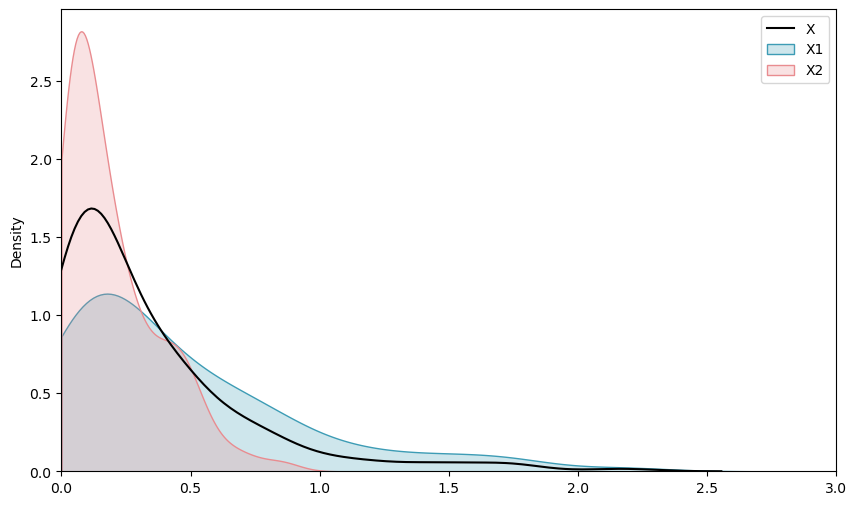

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/2, size=100)
X2 = np.random.exponential(scale=1/5, size=100)

# Genera la mixtura
X, target = sample(lambdas=[1/2, 1/5], size=100, random_state=42)

# Visualización de los datos con densidad
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X', clip=(0, np.inf))
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1', clip=(0, np.inf))
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2', clip=(0, np.inf))
ax.set_xlim(0, 3)
ax.legend()
plt.show()

In [10]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 45.50%
Accuracy GMM: 36.50%


In [ ]:
sizes = [50, 100, 200]
lambdas = [(1/3, 1/4), (1/5, 1/3), (1/8, 1/2)]
n_simulations = 100
results = []

for size in sizes:
    for l in lambdas:
        accuracy_emm = []
        accuracy_gmm = []

        for _ in np.arange(n_simulations):
            # Generamos una muestra con dos distribuciones exponenciales
            # X, y_true = Z(lambdas, true_weights)
            X, target = sample(l, size=size)

            # Ajustamos un modelo de mixtura de exponenciales
            emm = ExponentialMixtureModel(k=2, max_iter=100)
            emm.fit(X.reshape(-1, 1), verbose=False)
            y_pred_emm = emm.predict(X.reshape(-1, 1))

            # Ajustamos un modelo de mixtura de Gaussianas
            gmm = GaussianMixture(n_components=2, max_iter=100)
            gmm.fit(X.reshape(-1, 1))
            y_pred_gmm = gmm.predict(X.reshape(-1, 1))

            # Calculamos el accuracy de ambos modelos
            emm_acc = accuracy_score(target, y_pred_emm)
            accuracy_emm.append(emm_acc)
            gmm_acc = accuracy_score(target, y_pred_gmm)
            accuracy_gmm.append(gmm_acc)
        
        results.append({
            'size': size,
            'lambda1': l[0],
            'lambda2': l[1],
            'accuracy_emm': np.mean(accuracy_emm),
            'accuracy_gmm': np.mean(accuracy_gmm)
        })

In [20]:
sizes = np.arange(50, 400, 25)
# lambdas = [(1/3, 1/4), (1/5, 1/3), (1/8, 1/2)]
n_simulations = 100
# results = []

results = pd.DataFrame()
for size in sizes:
    accuracy_emm = []
    accuracy_gmm = []

    for _ in np.arange(n_simulations):
        # Generamos una muestra con dos distribuciones exponenciales
        X, target = sample(lambdas=[1/2, 1/5], size=size)

        # Ajustamos un modelo de mixtura de exponenciales
        emm = ExponentialMixtureModel(k=2, max_iter=100)
        emm.fit(X.reshape(-1, 1), verbose=False)
        y_pred_emm = emm.predict(X.reshape(-1, 1))

        emm_acc = accuracy_score(target, y_pred_emm)
        accuracy_emm.append(emm_acc)

        # Ajustamos un modelo de mixtura de Gaussianas
        gmm = GaussianMixture(n_components=2, max_iter=100, random_state=42)
        gmm.fit(X.reshape(-1, 1))
        y_pred_gmm = gmm.predict(X.reshape(-1, 1))

        gmm_acc = accuracy_score(target, y_pred_gmm)
        accuracy_gmm.append(gmm_acc)
    
    mean_accuracy_emm = np.mean(accuracy_emm)
    mean_accuracy_gmm = np.mean(accuracy_gmm)
    
    data = {'size': size, 'mean_accuracy_emm': mean_accuracy_emm, 'accuracy_gmm': mean_accuracy_gmm}
    results = pd.concat([results, pd.DataFrame(data, index=[0])], axis=0, ignore_index=True)

In [17]:
results.style.format({'mean_accuracy_emm': '{:.2f}', 'accuracy_gmm': '{:.2f}'})

,size,mean_accuracy_emm,accuracy_gmm
0,50,0.74,0.73
0,75,0.70,0.31
0,100,0.73,0.72
0,125,0.72,0.74
0,150,0.71,0.74
0,175,0.70,0.26
0,200,0.67,0.75
0,225,0.72,0.25
0,250,0.70,0.29
0,275,0.74,0.72


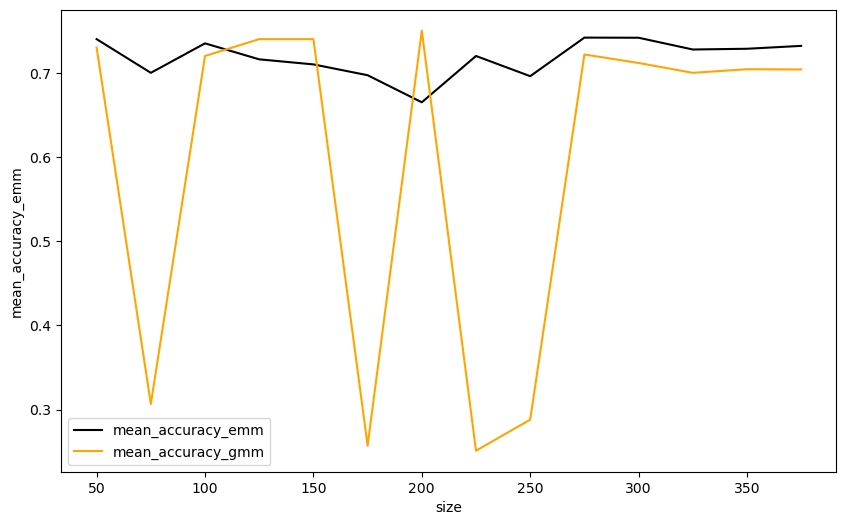

In [18]:
# Seed
np.random.seed(42)

# Visualización de los datos
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=results.iloc[:, 0], y=results.iloc[:, 1], color='black', ax=ax, label='mean_accuracy_emm')
sns.lineplot(x=results.iloc[:, 0], y=results.iloc[:, 2], color='orange', ax=ax, label='mean_accuracy_gmm')
ax.legend()

In [12]:
for result in results:
    print(f"Tamaño: {result['size']}, Lambda 1: {result['lambda1']:.4f}, Lambda 2: {result['lambda2']:.4f}")
    print(f"  Accuracy promedio EMM: {result['accuracy_emm'] * 100:.2f}%")
    print(f"  Accuracy promedio GMM: {result['accuracy_gmm'] * 100:.2f}%")

Tamaño: 50, Lambda 1: 0.3333, Lambda 2: 0.2500
  Accuracy promedio EMM: 50.00%
  Accuracy promedio GMM: 48.00%
Tamaño: 50, Lambda 1: 0.2000, Lambda 2: 0.3333
  Accuracy promedio EMM: 49.00%
  Accuracy promedio GMM: 64.00%
Tamaño: 50, Lambda 1: 0.1250, Lambda 2: 0.5000
  Accuracy promedio EMM: 74.00%
  Accuracy promedio GMM: 73.00%
Tamaño: 100, Lambda 1: 0.3333, Lambda 2: 0.2500
  Accuracy promedio EMM: 50.00%
  Accuracy promedio GMM: 46.00%
Tamaño: 100, Lambda 1: 0.2000, Lambda 2: 0.3333
  Accuracy promedio EMM: 50.00%
  Accuracy promedio GMM: 59.50%
Tamaño: 100, Lambda 1: 0.1250, Lambda 2: 0.5000
  Accuracy promedio EMM: 73.50%
  Accuracy promedio GMM: 72.00%
Tamaño: 200, Lambda 1: 0.3333, Lambda 2: 0.2500
  Accuracy promedio EMM: 50.00%
  Accuracy promedio GMM: 45.25%
Tamaño: 200, Lambda 1: 0.2000, Lambda 2: 0.3333
  Accuracy promedio EMM: 50.00%
  Accuracy promedio GMM: 60.25%
Tamaño: 200, Lambda 1: 0.1250, Lambda 2: 0.5000
  Accuracy promedio EMM: 66.50%
  Accuracy promedio GMM: 75

In [ ]:
df = pd.DataFrame()

df = pd.concat([])